---
# Introduction to Exploratory Data Analysis
---

---
## Step 0: Imports and Reading Data
---

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

---
## Step 1: Data Understanding
---

In [2]:
pd.set_option('display.max_rows', 50, 'display.max_columns', 80)

In [3]:
df = pd.read_csv('coaster_db.csv')

In [23]:
df.shape

(1087, 56)

In [32]:
df.head(3)

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,Height,Inversions,Lift/launch system,Cost,Trains,Park section,Duration,Capacity,G-force,Designer,Max vertical angle,Drop,Soft opening date,Fast Lane available,Replaced,Track layout,Fastrack available,Soft opening date.1,Closing date,Opened,Replaced by,Website,Flash Pass Available,Must transfer from wheelchair,Theme,Single rider line available,Restraint Style,Flash Pass available,Acceleration,Restraints,Name,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,50 ft (15 m),NaN,gravity,NaN,NaN,Coney Island Cyclone Site,1:00,1600 riders per hour,2.9,LaMarcus Adna Thompson,30°,43 ft (13 m),NaN,NaN,NaN,Gravity pulled coaster,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1884,40.574,-73.978,Wood,1884-06-16,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,NaN,1.0,NaN,NaN,a single car. Riders are arranged 1 across in ...,NaN,NaN,NaN,12,Lina Beecher,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1895,40.578,-73.979,Wood,1895-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1896,41.580,-81.570,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


In [33]:
df.columns

Index(['coaster_name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
       'Type', 'Manufacturer', 'Height restriction', 'Model', 'Height',
       'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       'Track layout', 'Fastrack available', 'Soft opening date.1',
       'Closing date', 'Opened', 'Replaced by', 'Website',
       'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       'Single rider line available', 'Restraint Style',
       'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 'height_value', 'height_unit', 'height_ft',
       'Inversions_clean', 'Gforce_clean'],
      dtype='object')

In [34]:
df.dtypes

coaster_name         object
Length               object
Speed                object
Location             object
Status               object
                     ...   
height_value        float64
height_unit          object
height_ft           float64
Inversions_clean      int64
Gforce_clean        float64
Length: 56, dtype: object

In [35]:
df.describe()

,Inversions,year_introduced,latitude,longitude,speed1_value,speed_mph,height_value,height_ft,Inversions_clean,Gforce_clean
count,932.000000,1087.000000,812.000000,812.000000,937.000000,937.000000,965.000000,171.000000,1087.000000,362.000000
mean,1.547210,1994.986201,38.373484,-41.595373,53.850374,48.617289,89.575171,101.996491,1.326587,3.824006
std,2.114073,23.475248,15.516596,72.285227,23.385518,16.678031,136.246444,67.329092,2.030854,0.989998
min,0.000000,1884.000000,-48.261700,-123.035700,5.000000,5.000000,4.000000,13.100000,0.000000,0.800000
25%,0.000000,1989.000000,35.031050,-84.552200,40.000000,37.300000,44.000000,51.800000,0.000000,3.400000
50%,0.000000,2000.000000,40.289800,-76.653600,50.000000,49.700000,79.000000,91.200000,0.000000,4.000000
75%,3.000000,2010.000000,44.799600,2.778100,63.000000,58.000000,113.000000,131.200000,2.000000,4.500000
max,14.000000,2022.000000,63.230900,153.426500,240.000000,149.100000,3937.000000,377.300000,14.000000,12.000000


---
## Step 2: Data Preparation

<ul>
<li>Dropping irrelevant columns and rows</li>
<li>Identifying duplicated columns</li>
<li>Renaming Columns</li>
<li>Feature Creation</li>
</ul>
---

In [9]:
# new_df = df.drop('Website', axis=1)
# new_df.tail(3)

In [11]:
new_df = df[['coaster_name', 
            #  'Length', 'Speed', 
             'Location', 'Status', 
            #  'Opening date','Type', 
             'Manufacturer', 
            #  'Height restriction', 'Model', 'Height',
            #  'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
            # 'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
            # 'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
            # 'Track layout', 'Fastrack available', 'Soft opening date.1',
            # 'Closing date', 'Opened', 'Replaced by', 'Website',
            # 'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
            # 'Single rider line available', 'Restraint Style',
            # 'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
            'year_introduced', 'latitude', 'longitude', 'Type_Main',
            'opening_date_clean', 
            # 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
            'speed_mph', 'height_value', 
            # 'height_unit', 'height_ft',
            'Inversions_clean', 'Gforce_clean']].copy()
new_df

,coaster_name,Location,Status,Manufacturer,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed_mph,height_value,Inversions_clean,Gforce_clean
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,50.0,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,American Dreier Looping,Other,NaN,Anton Schwarzkopf,2022,NaN,NaN,Steel,NaN,53.0,111.0,3,4.7
1083,Pantheon (roller coaster),Busch Gardens Williamsburg,Under construction,Intamin,2022,37.2339,-76.6426,Steel,2022-01-01,73.0,178.0,2,NaN
1084,Tron Lightcycle Power Run,Other,NaN,Vekoma,2022,NaN,NaN,Steel,2016-06-16,59.3,78.1,0,4.0
1085,Tumbili,Kings Dominion,Under construction,S&S – Sansei Technologies,2022,NaN,NaN,Steel,NaN,34.0,112.0,0,NaN


In [12]:
new_df.dtypes

coaster_name           object
Location               object
Status                 object
Manufacturer           object
year_introduced         int64
latitude              float64
longitude             float64
Type_Main              object
opening_date_clean     object
speed_mph             float64
height_value          float64
Inversions_clean        int64
Gforce_clean          float64
dtype: object

In [13]:
new_df['opening_date_clean'] = pd.to_datetime(new_df['opening_date_clean'])

In [14]:
new_df.dtypes

coaster_name                  object
Location                      object
Status                        object
Manufacturer                  object
year_introduced                int64
latitude                     float64
longitude                    float64
Type_Main                     object
opening_date_clean    datetime64[ns]
speed_mph                    float64
height_value                 float64
Inversions_clean               int64
Gforce_clean                 float64
dtype: object

In [15]:
new_df.columns

Index(['coaster_name', 'Location', 'Status', 'Manufacturer', 'year_introduced',
       'latitude', 'longitude', 'Type_Main', 'opening_date_clean', 'speed_mph',
       'height_value', 'Inversions_clean', 'Gforce_clean'],
      dtype='object')

In [16]:
new_df = new_df.rename(columns={'coaster_name': 'Coaster_name', 
                                'year_introduced': 'Year_Introduced',
                                'latitude': 'Latitude', 
                                'longitude': 'Longitude',
                                'opening_date_clean': 'Opening_Date', 
                                'speed_mph': 'Speed',
                                'height_value': 'Height', 
                                'Inversions_clean': 'Inversions', 
                                'Gforce_clean': 'Gforce'})
new_df.head(3)

,Coaster_name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_Date,Speed,Height,Inversions,Gforce
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.574,-73.978,Wood,1884-06-16,6.0,50.0,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.578,-73.979,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.580,-81.570,Other,NaT,NaN,NaN,0,NaN


In [17]:
new_df.isna().sum()

Coaster_name         0
Location             0
Status             213
Manufacturer        59
Year_Introduced      0
Latitude           275
Longitude          275
Type_Main            0
Opening_Date       250
Speed              150
Height             122
Inversions           0
Gforce             725
dtype: int64

In [22]:
new_df.duplicated()
new_df.loc[new_df.duplicated()]

,Coaster_name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_Date,Speed,Height,Inversions,Gforce


In [26]:

new_df.loc[new_df.duplicated(subset=['Coaster_name'])]

,Coaster_name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_Date,Speed,Height,Inversions,Gforce
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,96.0,0,4.0
60,Derby Racer,Revere Beach,Removed,Fred W. Pearce,1937,42.4200,-70.9860,Wood,1911-01-01,NaN,NaN,0,NaN
61,Blue Streak (Conneaut Lake),Conneaut Lake Park,Closed,NaN,1938,41.6349,-80.3180,Wood,1938-05-23,50.0,77.0,0,NaN
167,Big Thunder Mountain Railroad,Other,NaN,Arrow Development (California and Florida)Dyna...,1980,NaN,NaN,Steel,NaT,35.0,104.0,0,NaN
237,Thunder Run (Canada's Wonderland),Canada's Wonderland,Operating,Mack Rides,1986,43.8427,-79.5423,Steel,1981-05-23,39.8,10.0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,Lil' Devil Coaster,Six Flags Great Adventure,Operating,Zamperla,2021,40.1343,-74.4434,Steel,1999-01-01,NaN,13.0,0,NaN
1064,Little Dipper (Conneaut Lake Park),Conneaut Lake Park,Operating,Allan Herschell Company,2021,41.6343,-80.3165,Steel,1950-01-01,NaN,NaN,0,NaN
1080,Iron Gwazi,Busch Gardens Tampa Bay,Under construction,Rocky Mountain Construction,2022,28.0339,-82.4231,Steel,NaT,76.0,206.0,2,NaN
1082,American Dreier Looping,Other,NaN,Anton Schwarzkopf,2022,NaN,NaN,Steel,NaT,53.0,111.0,3,4.7


In [24]:
new_df.query('Coaster_name == "Crystal Beach Cyclone"')

,Coaster_name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_Date,Speed,Height,Inversions,Gforce
39,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1926,42.8617,-79.0598,Wood,1926-01-01,60.0,96.0,0,4.0
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,96.0,0,4.0


In [25]:
new_df.query('Coaster_name == "Derby Racer"')

,Coaster_name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_Date,Speed,Height,Inversions,Gforce
14,Derby Racer,Revere Beach,Removed,Fred W. Pearce,1911,42.42,-70.986,Wood,1911-01-01,NaN,NaN,0,NaN
60,Derby Racer,Revere Beach,Removed,Fred W. Pearce,1937,42.42,-70.986,Wood,1911-01-01,NaN,NaN,0,NaN


In [31]:
# ~  !!!
# ~ Використовується для побітового заперечення і логічної інверсії у випадку булевих значень
df = new_df.loc[~new_df.duplicated(subset=['Coaster_name', 'Location', 'Opening_Date'])] \
.reset_index()

In [32]:
df

,index,Coaster_name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_Date,Speed,Height,Inversions,Gforce
0,0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,50.0,0,2.9
1,1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN
3,3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,1079,Ice Breaker (roller coaster),SeaWorld Orlando,Under construction,Premier Rides,2022,28.4088,-81.4633,Steel,2022-02-01,52.0,93.0,0,NaN
986,1081,Leviathan (Sea World),Sea World,Under construction,Martin & Vleminckx,2022,-27.9574,153.4263,Wood,2022-01-01,49.7,32.0,0,NaN
987,1083,Pantheon (roller coaster),Busch Gardens Williamsburg,Under construction,Intamin,2022,37.2339,-76.6426,Steel,2022-01-01,73.0,178.0,2,NaN
988,1085,Tumbili,Kings Dominion,Under construction,S&S – Sansei Technologies,2022,NaN,NaN,Steel,NaT,34.0,112.0,0,NaN


---
## Step 3: Feature Understanding

### (Unvariate analysis)

<ul>
  <li>Plotting Feature Distributions
    <ul style="list-style-type: circle;">
      <li>Histogram</li>
      <li>KDE</li>
      <li>Boxplot</li>
    </ul>
  </li>
</ul>
---
    

In [33]:
df['Year_Introduced'].value_counts()

Year_Introduced
1999    46
2000    45
1998    30
2001    29
2002    28
        ..
1952     1
1956     1
1961     1
1955     1
1959     1
Name: count, Length: 101, dtype: int64

In [37]:
df['Year_Introduced'].value_counts().head(10)

Year_Introduced
1999    46
2000    45
1998    30
2001    29
2002    28
2008    27
2004    25
2007    24
2011    24
2006    23
Name: count, dtype: int64

In [38]:
df['Year_Introduced'].value_counts().tail(5)

Year_Introduced
1952    1
1956    1
1961    1
1955    1
1959    1
Name: count, dtype: int64

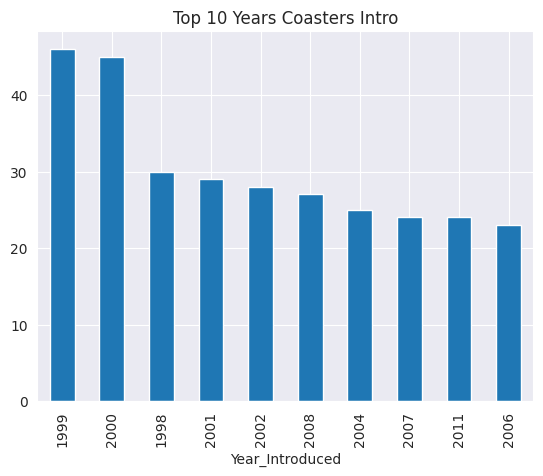

In [43]:
sns.set_style('darkgrid')
df['Year_Introduced'].value_counts().head(10).plot(kind='bar', title='Top 10 Years Coasters Intro')
plt.show()

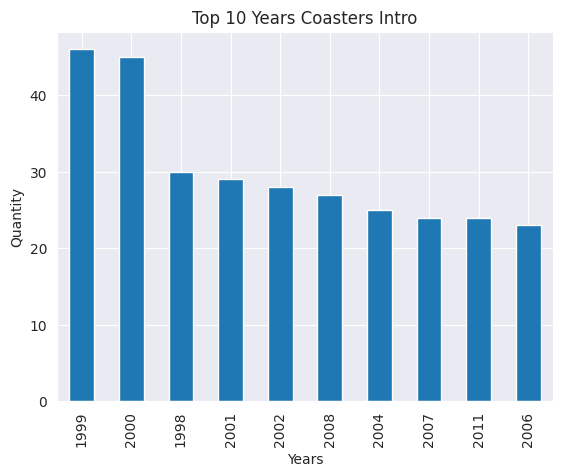

In [44]:
sns.set_style('darkgrid')
ax = df['Year_Introduced'].value_counts().head(10).plot(kind='bar', title='Top 10 Years Coasters Intro')

ax.set_xlabel('Years')
ax.set_ylabel('Quantity')

plt.show()

##### https://uk.wikipedia.org/wiki/%D0%9D%D0%BE%D1%80%D0%BC%D0%B0%D0%BB%D1%8C%D0%BD%D0%B8%D0%B9_%D1%80%D0%BE%D0%B7%D0%BF%D0%BE%D0%B4%D1%96%D0%BB

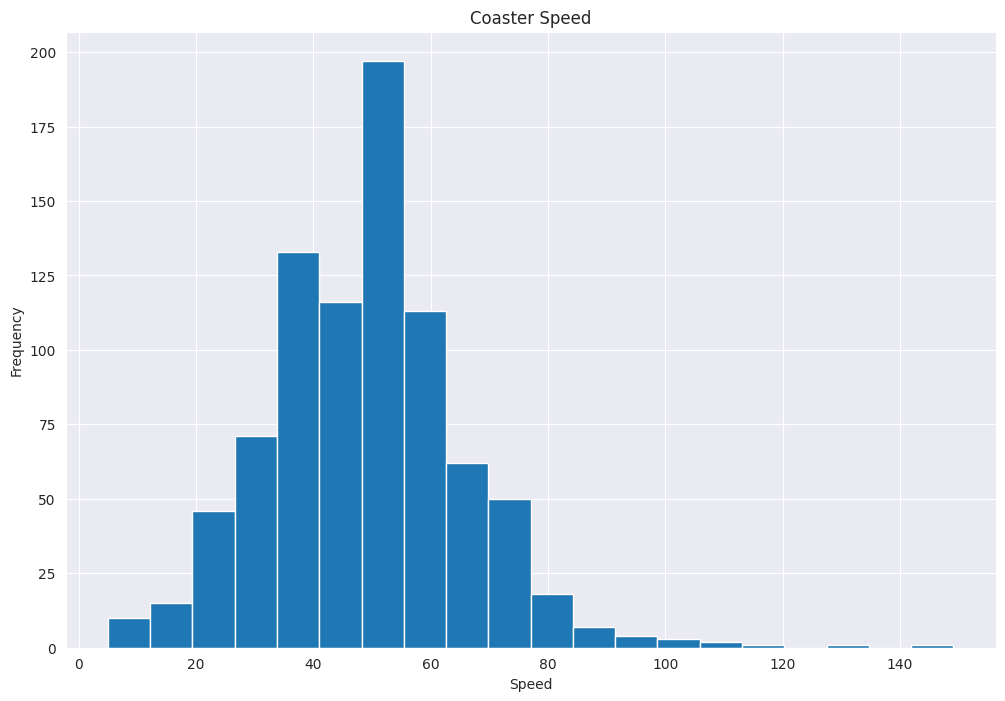

In [50]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
ax = df['Speed'].plot(kind='hist', bins = 20, title='Coaster Speed')

ax.set_xlabel('Speed')
ax.set_ylabel('Frequency')

plt.show()

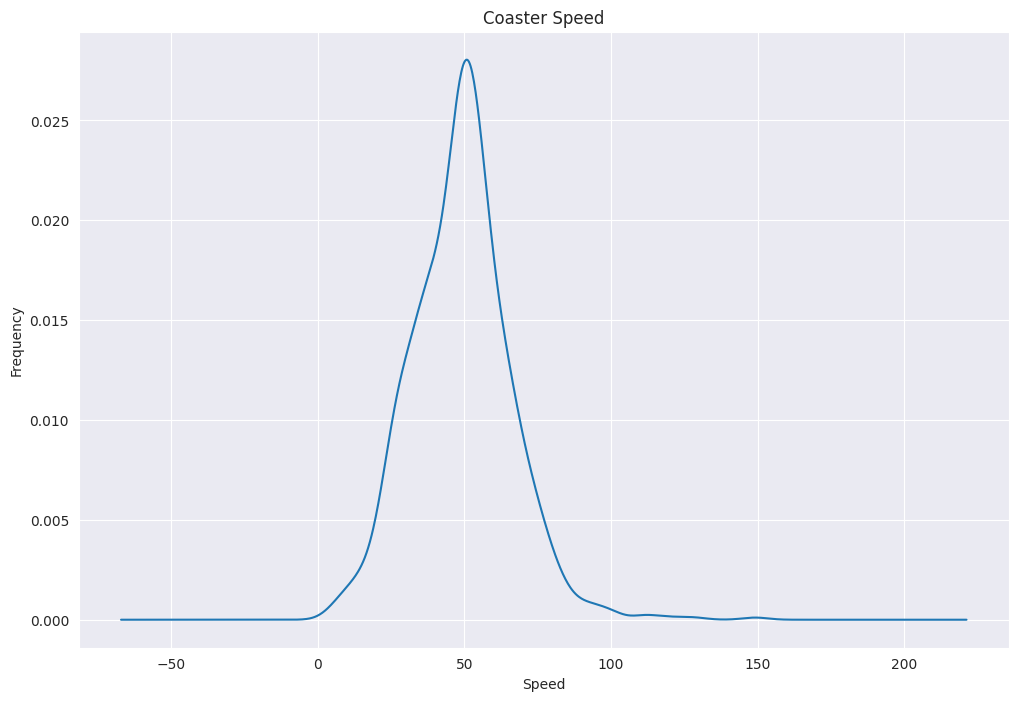

In [51]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
ax = df['Speed'].plot(kind='kde', title='Coaster Speed')

ax.set_xlabel('Speed')
ax.set_ylabel('Frequency')

plt.show()

In [52]:
df['Type_Main'].value_counts()

Type_Main
Steel    728
Wood     191
Other     71
Name: count, dtype: int64

---
## Step 4: Feature Relationships

<ul>
    <li>Scatterplot</li>
    <li>Heatmap Correlation</li>
    <li>Pairplot</li>
    <li>Groupby comparisons</li>
</ul>
---

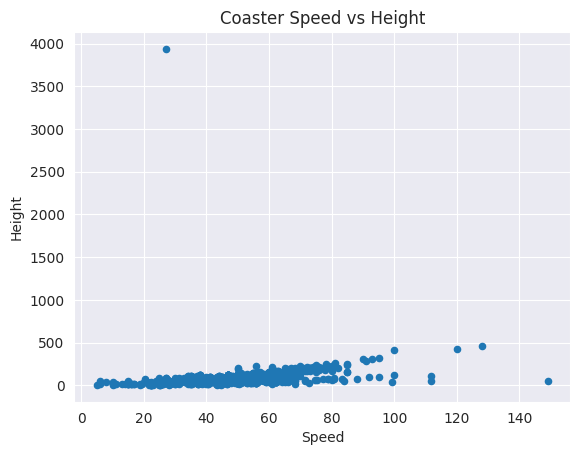

In [56]:

ax = df.plot(kind='scatter', 
                      x = 'Speed',
                      y = 'Height',
                      title='Coaster Speed vs Height')
plt.show()

In [57]:
df.query('Height > 3500')

,index,Coaster_name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_Date,Speed,Height,Inversions,Gforce
836,905,Smoky Mountain Alpine Coaster,Other,Operating,Wiegand,2013,35.7934,-83.5965,Steel,2013-08-03,27.0,3937.0,0,NaN


In [58]:
df = df.drop([836] , axis=0)

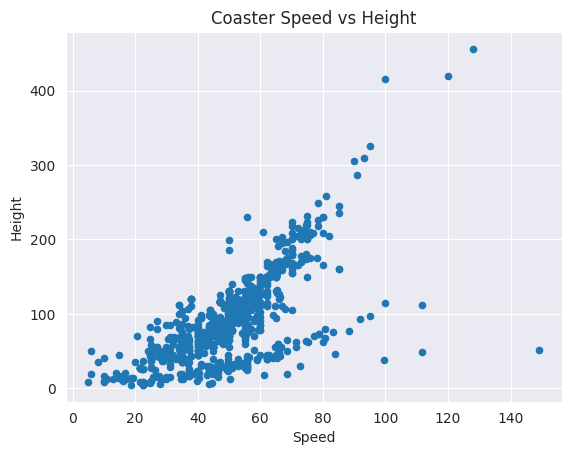

In [59]:
ax = df.plot(kind='scatter', 
                      x = 'Speed',
                      y = 'Height',
                      title='Coaster Speed vs Height')
plt.show()

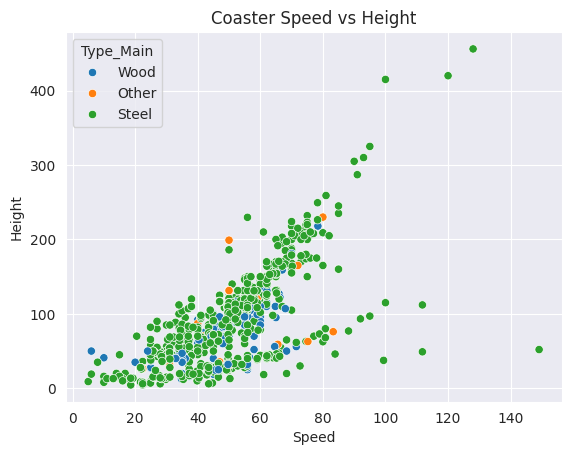

In [65]:
ax = sns.scatterplot(x = 'Speed',
                     y = 'Height',
                     hue = 'Type_Main',
                     data=df)
ax.set_title('Coaster Speed vs Height')
plt.show()

In [66]:
df.columns

Index(['index', 'Coaster_name', 'Location', 'Status', 'Manufacturer',
       'Year_Introduced', 'Latitude', 'Longitude', 'Type_Main', 'Opening_Date',
       'Speed', 'Height', 'Inversions', 'Gforce'],
      dtype='object')

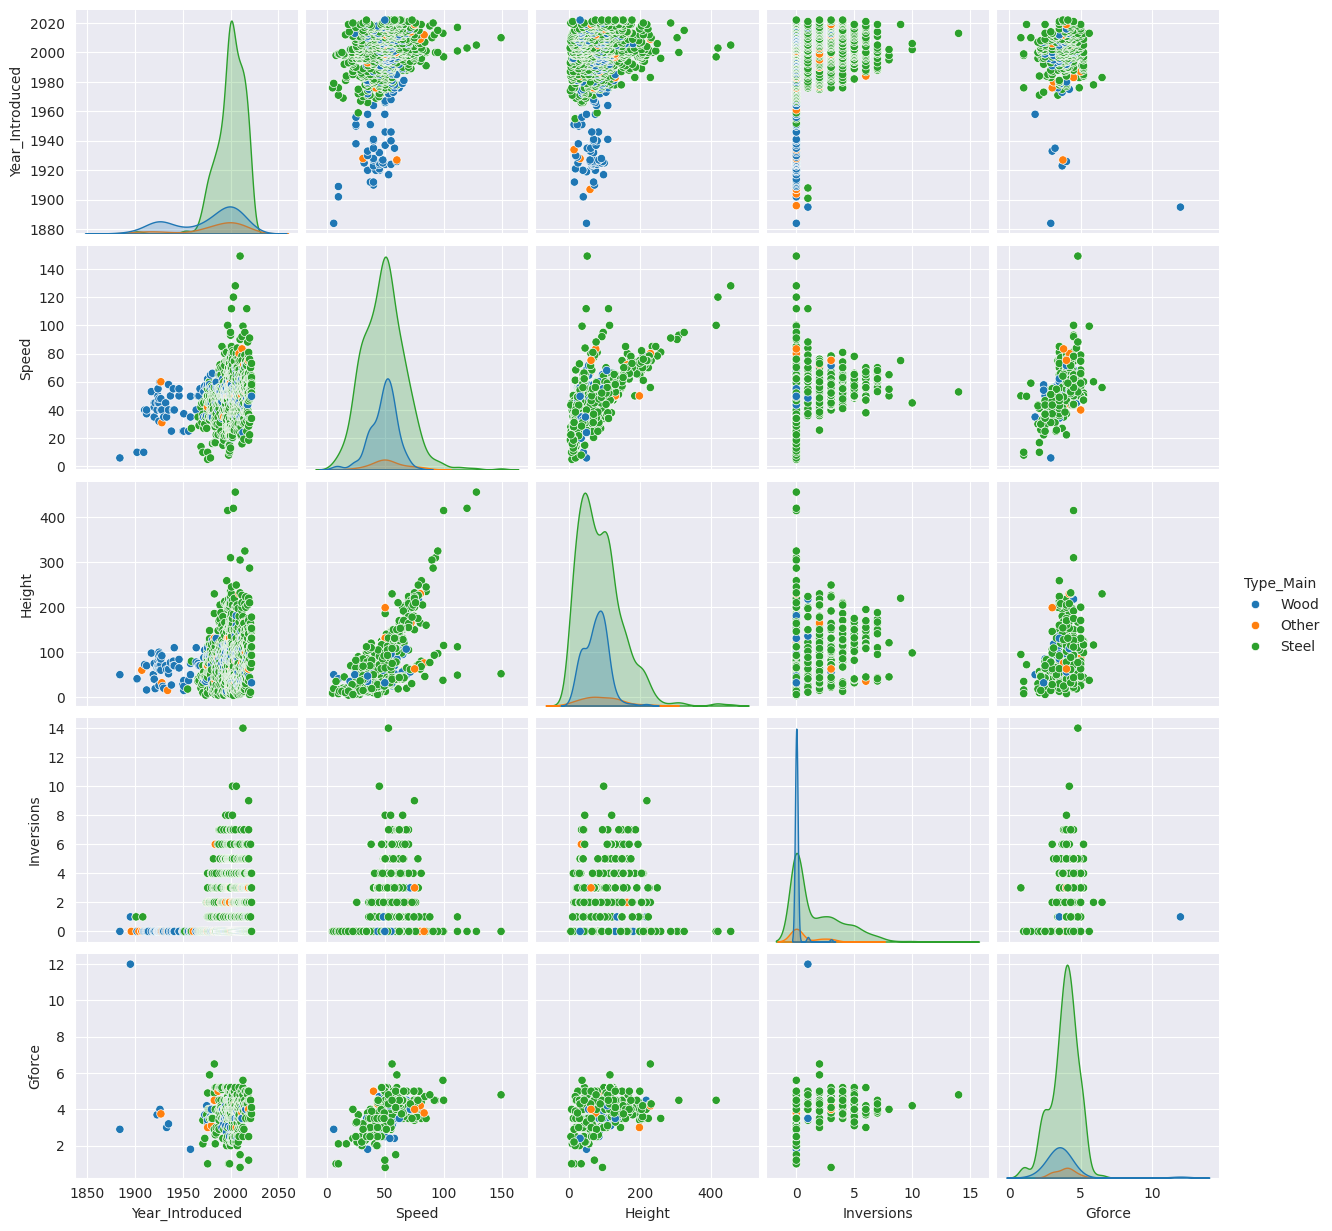

In [67]:
sns.pairplot(df,
             vars=['Year_Introduced', 'Speed', 'Height', 'Inversions', 'Gforce'],
             hue = 'Type_Main')

In [68]:
df_corr = df[['Year_Introduced', 'Speed', 'Height', 'Inversions', 'Gforce']].dropna().corr()
df_corr

,Year_Introduced,Speed,Height,Inversions,Gforce
Year_Introduced,1.000000,0.246912,0.051000,0.130292,0.108240
Speed,0.246912,1.000000,0.576132,0.126254,0.511409
Height,0.051000,0.576132,1.000000,0.179112,0.338006
Inversions,0.130292,0.126254,0.179112,1.000000,0.386641
Gforce,0.108240,0.511409,0.338006,0.386641,1.000000


<Axes: >

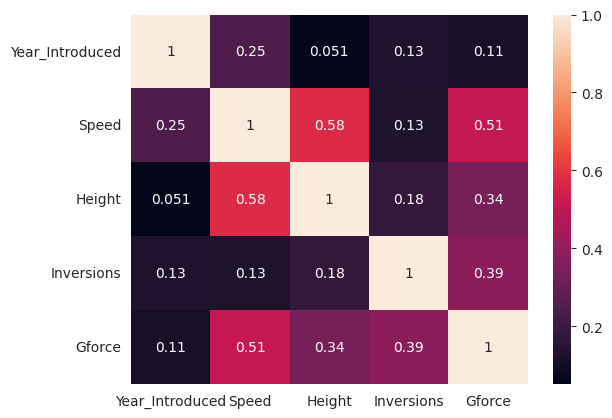

In [69]:
sns.heatmap(df_corr, annot=True)

---
## Step 5: Ask a Question about the data

- Try to answer a question you have about the data using a plot or statistic.

### What are the locations with the fastest roller coasters(minimum 10)?
---

In [70]:
df.head(3)


,index,Coaster_name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_Date,Speed,Height,Inversions,Gforce
0,0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.574,-73.978,Wood,1884-06-16,6.0,50.0,0,2.9
1,1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.578,-73.979,Wood,1895-01-01,NaN,NaN,1,12.0
2,2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.580,-81.570,Other,NaT,NaN,NaN,0,NaN


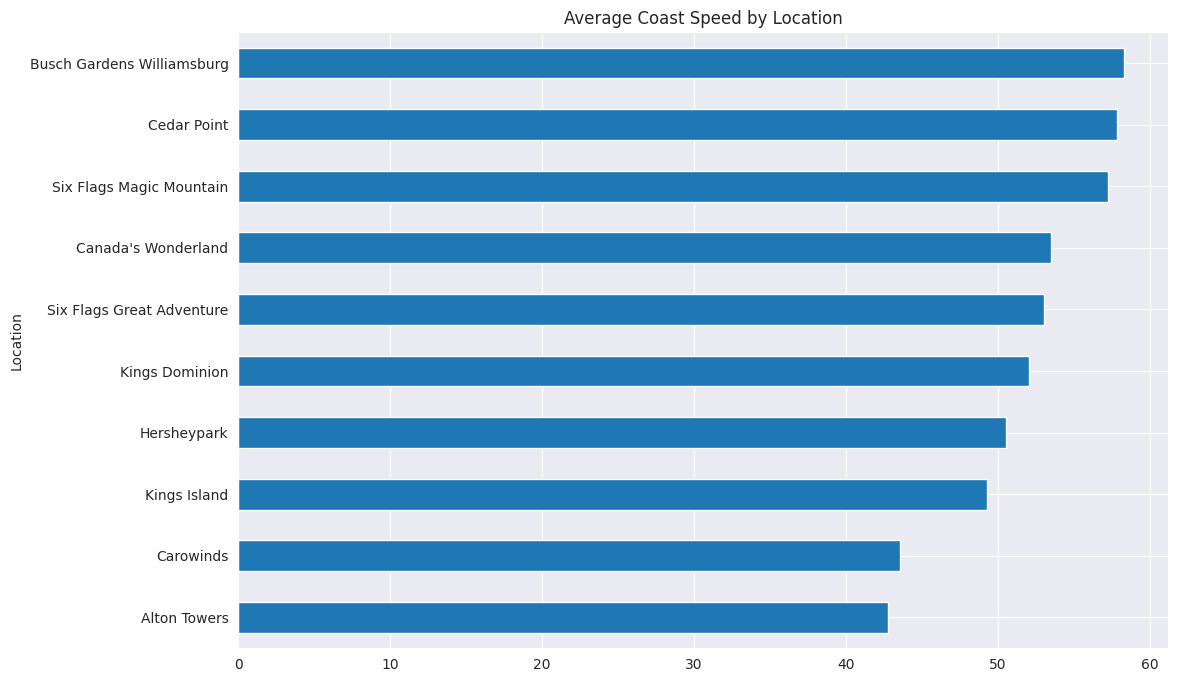

In [75]:
df.query('Location != "Other"')\
.groupby('Location')['Speed']\
.agg(['mean', 'count'])\
.query('count >= 10')\
.sort_values('mean')['mean']\
.plot(kind = 'barh', figsize=(12,8), title='Average Coast Speed by Location')

plt.show()